In [22]:
import numpy as np
import scipy as sp
from numpy.random import rand
import matplotlib.pyplot as plt

In [28]:
test=rand(4,4)

In [29]:
test

array([[0.5050427 , 0.91911382, 0.72401027, 0.00538827],
       [0.6653646 , 0.11775411, 0.53081108, 0.34157587],
       [0.42576464, 0.11493817, 0.78121757, 0.73737139],
       [0.82373176, 0.48721365, 0.14385111, 0.47937581]])

In [41]:
site=(1,1)
connectivity_mask = [[0,1,0],[1,0,1],[0,1,0]]
subset = test[site[0]-1:site[0]+2,site[1]-1:site[1]+2]
neighbor_vals = subset*connectivity_mask
neighbor_vals

array([[0.        , 0.91911382, 0.        ],
       [0.6653646 , 0.        , 0.53081108],
       [0.        , 0.11493817, 0.        ]])

In [48]:
# 2D Square Lattice nearest neighbor connectivity
connectivity = [(1,0),(0,1),(-1,0),(0,-1)]

def out_of_bounds(site,N):
    return np.any([ val < 0 or val > N-1 for val in site]) 
        
def neighbors(site,N):
    hold = []
    for bond in connectivity:
        target = tuple(p+q for p, q in zip(site, bond))
        if not out_of_bounds(target,N):
            hold.append(target)
    return hold

In [83]:
def generate_cluster(p, R, lbl=1):
    N = 2*R+1
    lattice = np.zeros((N,N),dtype=np.int32)
    lattice[R,R] = lbl
    perimeter = [(R,R)]

    while True:
        next_perimeter=[]
        for site in perimeter:
            for target in neighbors(site,N):
                if abs(lattice[target]) != lbl:
                    val = (p<rand())*(lbl+1)-1
                    lattice[target] = val
                    if val == lbl:
                        next_perimeter.append(target)
        if len(next_perimeter)==0:
            break
        perimeter = next_perimeter
    return lattice


def generate_dense_cluster(p,R,lbl=1,lattice=None):
    if lattice is not None:
        starts = np.argwhere(lattice < 0)
        if not starts.size:
            return lattice
        start=tuple(starts[0])
        N=lattice.shape[0]
        lattice[start]=lbl
        perimeter = [start]
        
    else:
        N = 2*R+1
        lattice = np.zeros((N,N),dtype=np.int32)
        lattice[R,R] = lbl
        perimeter = [(R,R)]
        
        
    while True:
        next_perimeter=[]
        for site in perimeter:
            for target in neighbors(site,N):
                if lattice[target] <=0 and lattice[target] != -1*lbl:
                    val = lbl*(2*(p<rand())-1)
                    lattice[target] = val
                    if val == lbl:
                        next_perimeter.append(target)
        if len(next_perimeter)==0:
            break
        perimeter = next_perimeter
    return lattice

def generate_network(p,R,max_iter=50):
    lbl=1
    lattice=generate_dense_cluster(p,R)
    while lbl in lattice:
        lbl+=1
        lattice = generate_dense_cluster(p,R,lbl,lattice)
        if lbl >= max_iter:
            break
    return lattice
        

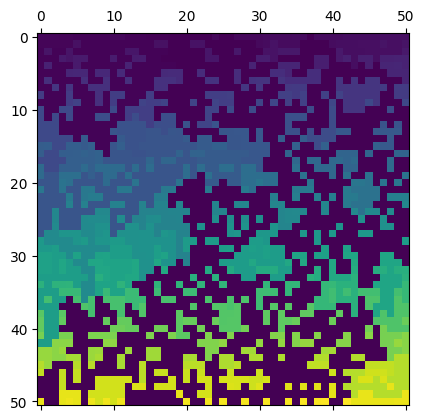

In [88]:
p=.4
R=25

lattice=generate_network(p,R,max_iter=np.inf)

plt.matshow(lattice)

In [90]:
lattice

array([[  9,   9,  10, ...,  21,  21,  21],
       [  8,   8,   8, ...,  21,  21,  27],
       [  5,  28,   5, ...,  21,  21,  35],
       ...,
       [  1,   1,   1, ..., 470, 434, 434],
       [  1,   1,   1, ..., 434, 434, 474],
       [475,   1,   1, ..., 473, 474, 474]])

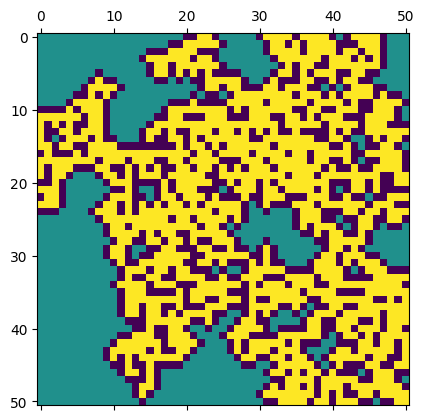

In [75]:
plt.matshow(lattice)

In [112]:
pvals = np.arange(.2,.6,.01)
trials=1000
R_vals=[10,15,20,25]
avg_cluster_size={}
errs={}

In [113]:
for R in R_vals:
    avg_cluster_size[R] = np.zeros(len(pvals))
    errs[R] = np.zeros(len(pvals))
    for idx, p in enumerate(pvals):
        data=[np.count_nonzero(generate_cluster(p,R)>0) for _ in range(trials)]
        avg_cluster_size[R][idx] = np.mean(data)
        errs[R][idx] = np.std(data)

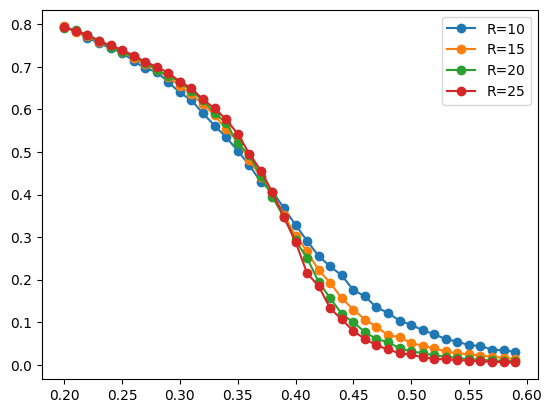

In [115]:
for R in R_vals:
    plt.errorbar(pvals, avg_cluster_size[R]/(2*R+1)**2,marker='o',label=f"R={R}")
plt.legend()
plt.show()

In [ ]:
ax=plt.axes()
ax.errorbar(pvals, avg_cluster_size, yerr=errs,linestyle='',marker='o')
ax.set_xscale("log")
ax.set_yscale("log")
plt.show()